## Decision Trees

Decision trees can be used for linear and nonlinear classification/regression tasks.      

### Classification
Objective:  The CART algorithm used by Scikit-learn splits the training data to minimize impurity.

Use DecisionTreeClassifier

### Regression
Objective:  The CART algorithm used by Scikit-learn splits the training data to minimize MSE.

Use DecisionTreeRegressor


### Key Terms
**CART algorithm:** (Classification and Regression Tree). Used by Scikit-learn. Produces only binary trees: nonleaf nodes always have two children (yes/no answers)        
**Impurity:** a node is “pure” (gini=0) if all training instances it applies to belong to the same class.       
**MSE:** Mean Squared Error. Measures the average of the squares of the errors or deviations—that is, the difference between the estimator and what is estimated


In [48]:
# import libraries
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

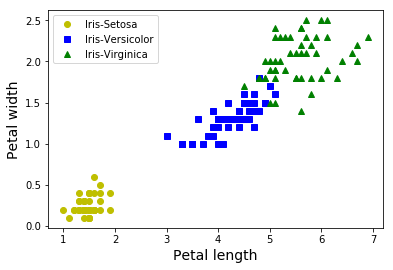

In [51]:
# Load and visualize data
iris = datasets.load_iris()
X = iris["data"][:,2:] # petal length and width
Y = iris["target"]
# X.shape
# Y.shape
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo",label="Iris-Setosa")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs",label="Iris-Versicolor") 
plt.plot(X[:,0][Y==2], X[:,1][Y==2],"g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()

In [23]:
# Train decision tree classifier
dtree_clf = DecisionTreeClassifier(max_depth=3)
dtree_clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
# Predict
print(dtree_clf.predict_proba([[6, 1.5]])) # a flower with petal length of 5cm and width of 1.5cm
dtree_clf.predict([[5, 1.5]]) 
# array([2]): iris virginica

[[ 0.          0.33333333  0.66666667]]


array([2])

In [45]:
# Visualize the decision logic tree
from  sklearn.tree import export_graphviz

# generates a .dot file. 
export_graphviz(
        dtree_clf,
        out_file = "iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# convert to png file with command below (download graphviz package):
# $ dot -Tpng iris_tree.dot -o iris_tree.png

## Or use this online graphviz vizualizer: https://dreampuf.github.io/GraphvizOnline/ 

<img src="./images/iris_DecisionTree.png">

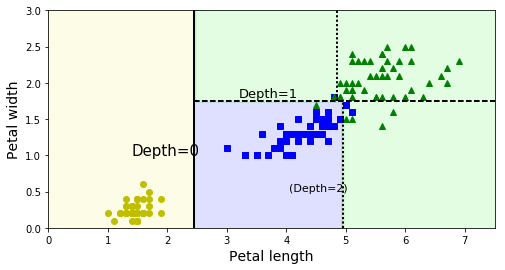

In [50]:
# Visualize decision boundaries
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, Y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(dtree_clf, X, Y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


## References

“Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron (O’Reilly). Copyright 2017 Aurélien Géron, 978-1-491-96229-9.”   